This notebook provides code examples for generating sample data, calculating quartiles, and visualizing data with Python. It demonstrates basic data manipulation and visualization techniques to help identify and understand outliers.

In [99]:
import pandas as pd
import numpy as np

# Parameters
num_products = 4
num_entries_per_product = 40
products = range(1, num_products + 1)
outlier_fraction = 0.05

# Generate normal data
data = {
    'reception_date': pd.date_range(start='2023-01-01', periods=num_entries_per_product * num_products, freq='D'),
    'product_id': np.repeat(products, num_entries_per_product),
    'quantity': np.random.randint(1, 100, num_entries_per_product * num_products),
    'expiry_days_from_reception': np.random.normal(loc=50, scale=25, size=num_entries_per_product * num_products).astype(int)
}
df = pd.DataFrame(data)

# Add outliers
num_outliers = int(outlier_fraction * num_entries_per_product * num_products)
outliers = np.random.randint(100, 200, size=num_outliers)

# Randomly assign outliers to the dataset
outlier_indices = np.random.choice(df.index, num_outliers, replace=False)
df.loc[outlier_indices, 'expiry_days_from_reception'] = outliers

df.head()

,reception_date,product_id,quantity,expiry_days_from_reception
0,2023-01-01,1,52,57
1,2023-01-02,1,19,64
2,2023-01-03,1,17,37
3,2023-01-04,1,90,28
4,2023-01-05,1,51,44


In [100]:
# Calculate Q1, Q2, Q3 for each product_id
quartiles = df.groupby('product_id')['expiry_days_from_reception'].quantile([0.25,0.5,0.75]).unstack()
quartiles.columns = ['Q1','Q2','Q3']
df = df.merge(quartiles, on='product_id', how='left')

# Create a column to store threshold values
df['threshold'] = df['Q3']+(df['Q3'] - df['Q1']) * 1.5
df['is_outlier'] = df['expiry_days_from_reception'] > df['threshold']

🔍 The Interquartile Range (IQR) measures statistical spread by dividing the data into quartiles:
Q1 (First Quartile): The 25th percentile, where 25% of the data lies below it.
Q2 (Second Quartile): The 50th percentile, where 50% of the data lies below it also called the median
Q3 (Third Quartile): The 75th percentile, where 75% of the data lies below it.

In [105]:
# Filter and sort data for product_id=1
filtered_df = df[df['product_id'] == 2].sort_values(by='expiry_days_from_reception')

# Add markers for Q1 and Q3
filtered_df['Q1_marker'] = filtered_df['expiry_days_from_reception'].apply(lambda x: 'X' if x >= filtered_df['Q1'].iloc[0] else '')
filtered_df['Q2_marker'] = filtered_df['expiry_days_from_reception'].apply(lambda x: 'X' if x >= filtered_df['Q2'].iloc[0] else '')
filtered_df['Q3_marker'] = filtered_df['expiry_days_from_reception'].apply(lambda x: 'X' if x >= filtered_df['Q3'].iloc[0] else '')
filtered_df_reset = filtered_df[['product_id','reception_date','quantity','expiry_days_from_reception','Q1_marker','Q2_marker','Q3_marker']].reset_index(drop=True)
pd.set_option('display.max_rows', None)
filtered_df_reset.head()

,product_id,reception_date,quantity,expiry_days_from_reception,Q1_marker,Q2_marker,Q3_marker
0,2,2023-03-10,7,-4,,,
1,2,2023-02-10,29,-2,,,
2,2,2023-02-23,99,18,,,
3,2,2023-03-13,32,21,,,
4,2,2023-02-24,13,21,,,
5,2,2023-02-22,32,28,,,
6,2,2023-03-17,60,30,,,
7,2,2023-03-06,78,30,,,
8,2,2023-03-02,54,32,,,
9,2,2023-03-21,77,35,,,


c:\Users\5060916\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


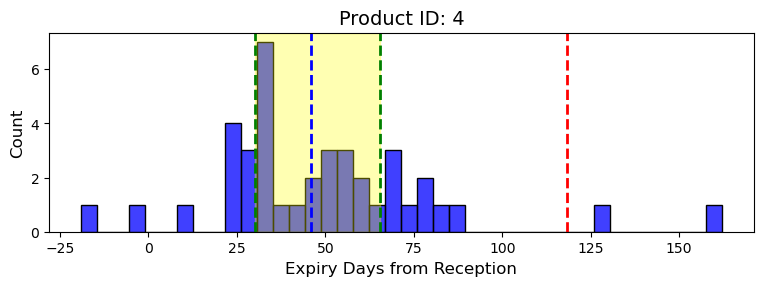

In [110]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(20, 15))

product=4
plt.subplot(5, 2, i)
product_data = df[df['product_id'] == product]
    
# Plot the bars
bars = sns.histplot(product_data['expiry_days_from_reception'], bins=40, kde=False, color='blue', label='Expiry Days')
plt.axvline(product_data['threshold'].iloc[0], color='red', linestyle='dashed', linewidth=2, label='Threshold')
plt.axvline(product_data['Q1'].iloc[0], color='green', linestyle='dashed', linewidth=2, label='Threshold')
plt.axvline(product_data['Q2'].iloc[0], color='blue', linestyle='dashed', linewidth=2, label='Threshold')
plt.axvline(product_data['Q3'].iloc[0], color='green', linestyle='dashed', linewidth=2, label='Threshold')
plt.axvspan(product_data['Q1'].iloc[0], product_data['Q3'].iloc[0], color='yellow', alpha=0.3)
    
plt.title(f'Product ID: {product}', fontsize=14)
plt.xlabel('Expiry Days from Reception', fontsize=12)
plt.ylabel('Count', fontsize=12)

plt.show()

c:\Users\5060916\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\5060916\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\5060916\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\5060916\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed

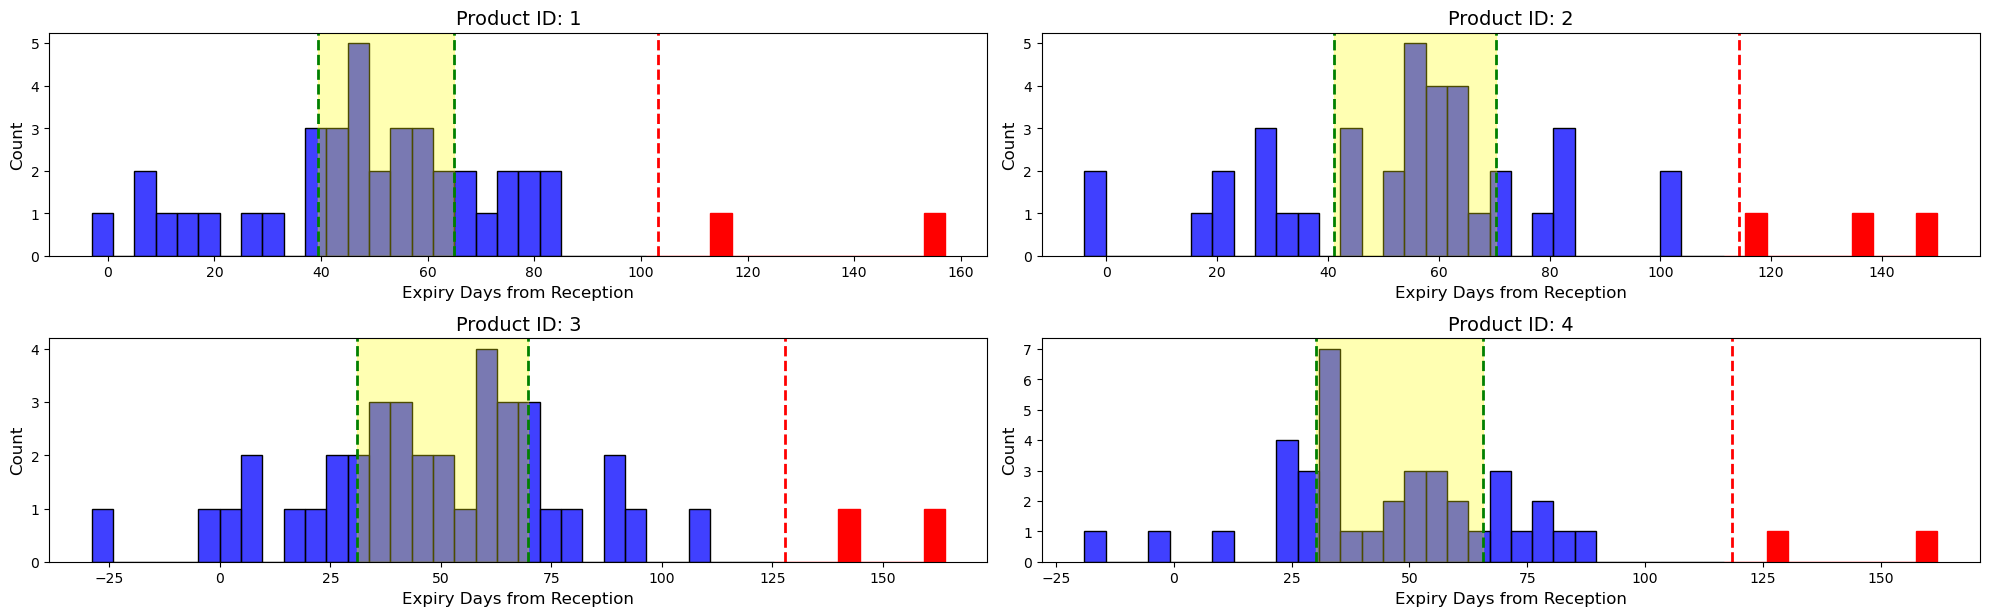

In [111]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(20, 15))

for i, product in enumerate(range(1, num_products + 1), 1):
    plt.subplot(5, 2, i)
    product_data = df[df['product_id'] == product]
    
    # Plot the bars
    bars = sns.histplot(product_data['expiry_days_from_reception'], bins=40, kde=False, color='blue', label='Expiry Days')
    
    # Color the bars that exceed the threshold in red
    for bar in bars.patches:
        if bar.get_x() + bar.get_width() > product_data['threshold'].iloc[0]:
            bar.set_color('red')
    
    plt.axvline(product_data['threshold'].iloc[0], color='red', linestyle='dashed', linewidth=2, label='Threshold')
    plt.axvline(product_data['Q1'].iloc[0], color='green', linestyle='dashed', linewidth=2, label='Threshold')
    plt.axvline(product_data['Q3'].iloc[0], color='green', linestyle='dashed', linewidth=2, label='Threshold')
    plt.axvspan(product_data['Q1'].iloc[0], product_data['Q3'].iloc[0], color='yellow', alpha=0.3)
    
    plt.title(f'Product ID: {product}', fontsize=14)
    plt.xlabel('Expiry Days from Reception', fontsize=12)
    plt.ylabel('Count', fontsize=12)

plt.tight_layout()
plt.show()